<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/dm_lab_2_fm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise-2
## by Fayyaz Minhas
## Gradient Descent and Perceptron


# Understanding gradient Descent

We discussed how gradient descent works for solving optimization problems: By taking steps in a direction opposite to the gradient. Below is a very simple implementation for this method. Based on this, can you:
1. Try to understand how Gradient Descent Works
2. Can you find the  minima of the following function: $f(v)=2v^2-v$. You will need to update the implementation of the function and its derivative in the code for this.
3. What happens when you use: $f(v)=sin(3v)$? Is this function convex?
4. What do you think are the limitations of gradient descent for non-convex functions?
5. What happens when you change the learning rate parameter (step size)?
You can also look into questions posted as part of the self assessment exercise.



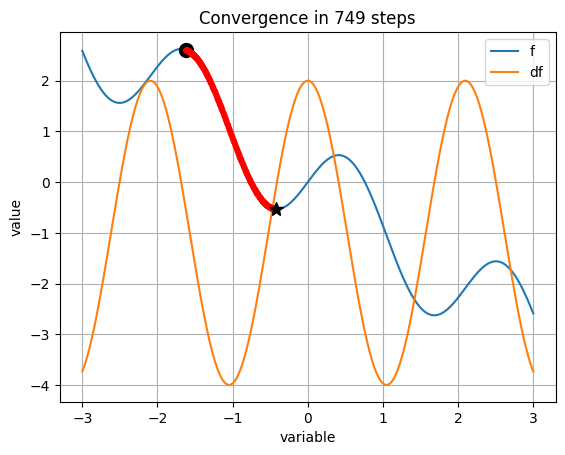

In [1]:
import numpy as np

def gd(f,df,v0=0.0,lr = 0.01,eps=1e-4,nmax=1000, history = True):
    """
    Implementation of a (single variable) gradient descent solver.
        f: function, f(v) returns value of f(v) for a given v
        df: gradient function df(v) returns the gradient at v
        v0: initial position [Default 0.0]
        lr: learning rate [0.001]
        eps: min step size threshold [1e-4]
        nmax: maximum number of iters [1000]
        history: whether to store history of x or not [True]
    Returns:
        v: argmin_v f(v)
        converged: True if the final step size is less than eps else false
        H: history
    """
    H = []
    v = v0
    if history:
        H = [[v,f(v)]]
    for i in range(nmax):
        dv = -lr*df(v) #gradient step
        if np.linalg.norm(dv)<eps: # if the step taken is too small, we have converged
            break
        if history:
            H.append([v+dv,f(v+dv)])
        v = v+dv #gradient update
    converged = np.linalg.norm(dv)<eps
    return v,converged,np.array(H)
def plotGD(v,f,df,H,c):
    import matplotlib.pyplot as plt
    """
    Just plotting code
    """
    plt.figure()
    vplot = np.sort(np.hstack((v,H[:,0]))) #just ensure that the range of v over the optimization history is included in plotting
    plt.plot(vplot,f(vplot)); plt.plot(vplot,df(vplot));
    plt.legend(['f','df'])
    plt.xlabel('variable');plt.ylabel('value')
    s = 'Convergence in '+str(len(H))+' steps'
    if not c:
        s = 'No '+s
    plt.title(s)
    plt.plot(H[0,0],H[0,1],'ko',markersize=10)
    plt.plot(H[:,0],H[:,1],'r.-')
    plt.plot(H[-1,0],H[-1,1],'k*',markersize=10)
    plt.grid(); plt.show()

if __name__=='__main__':

    def f(v):
        return np.sin(3*v)-v

    def df(v):
        return 3*np.cos(3*v)-1
        return vectorized_dloss(v)

    v = np.linspace(-3,3,1000)

    #select random initial point in the range
    v0 = np.min(v)+(np.max(v)-np.min(v))*np.random.rand()
    vout,c,H = gd(f,df,v0=v0,lr = 0.001,eps=1e-4,nmax=1000, history = True)
    plotGD(v,f,df,H,c)



  ## Implementation of a very simple perceptron using the gradient descent function

  Now we will use the gradient descent function to implement a very simple perceptron. Let's assume we have a single feature and only two examples (one positive and one negative). Furthermore, for simplicity, we will assume that we have no bias.

  1. Look at the two examples and their labels in the code below and manually calculate the value of w which would enable correct classification for this example.

  2. Check the implementation of the loss function and its derivatives as we will be using this as input to the gradient descent solver. Make sure that you understand how this code is solving the following optimization problem.

  $$ min_w \frac{1}{N}\sum_{i=1}^N loss(y_i, f(x_i;w))$$

  where $$f(x_i;w)=wx_i$$ is the prediction function (not to be confused with $f$ in the above gd(f,df...)  function).

  3. Check if the weighth value returned by the gd function is indeed correct.
  

<ipython-input-1-eddfe1ccc2cc>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return v,converged,np.array(H)


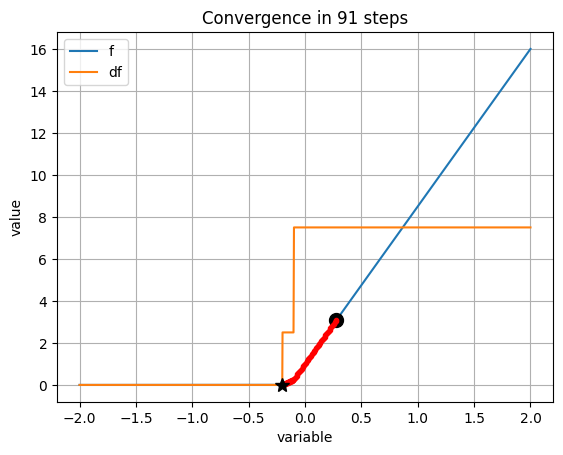

The optimal solution is: [-0.20199116]


In [13]:
    X = np.array([[5],[-10]])
    Y = np.array([-1,1])
    def loss(y,x,w): return max(0.0,1-y*x*w) #hinge loss in terms of y,x and w
    def loss_w(w): return np.mean([loss(Y[i],X[i],w) for i in range(len(Y))]) # loss in terms of w only
    vectorized_loss = np.vectorize(loss_w)  #simply vectorizing this function so that we can pass multiple w as input at once

    def dloss(y,x,w): #derivate of loss with respect to w for a given x and y
        if (1-y*w*x)<0:
            return 0.0
        else:
            return -y*x
    def dloss_w(w): return np.mean([dloss(Y[i],X[i],w) for i in range(len(Y))]) #derivative of the loss with respect to w only
    vectorized_dloss = np.vectorize(dloss_w) #simply vectorizing this function so that we can pass multiple w as input at once

    f = vectorized_loss
    df = vectorized_dloss
    v = np.linspace(-2,2,1000)
    v0 = np.min(v)+(np.max(v)-np.min(v))*np.random.rand()

    vout,c,H = gd(f,df,v0=v0,lr = 0.001,eps=1e-4,nmax=1000, history = True)
    plotGD(v,f,df,H,c)
    print("The optimal solution is:",vout)

## Importing plotit

To use the code in the following exercises you will need to execute the cell below


In [3]:
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None or len(conts)<2:
            #conts = list(classes)
            vmin,vmax = classes[0]-eps,classes[-1]+eps
        else:
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps

    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None or len(conts)<2:
            conts = sorted([-1+eps,0,1-eps])
        else:
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps

    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)

        z = np.reshape(z,(npts,npts)).T


        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)

    if Y is not None:
        for i,y in enumerate(classes):

            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]

            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 50)

    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    if not hold:
        plt.grid()
        plt.show()
    return extent

# Implementation of Perceptron

Below is an implementation of a perceptron which will be discussed in class. It allows you to track the learning in each iteration and its effect on the decision boundary (if you set save_gif = True). See if you can figure out how the gradient descent based code gets mapped to this implementation.

Prediction Scores: [-0.3        -0.19124347 -0.02276257  0.08599396]
Prediction Labels: [-1. -1. -1.  1.]


<ipython-input-3-ec5585c83180>:63: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')


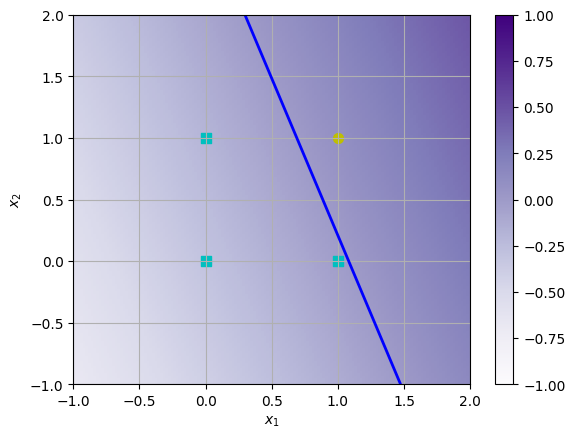

In [4]:
import imageio.v2 as imageio
import os

class Perceptron:
    def __init__(self,alpha = 0.1, epochs = 200,save_gif = False):
        self.alpha = alpha
        self.epochs = epochs
        self.W = np.array([0])
        self.bias = np.random.randn()*0

        self.save_gif = save_gif
    def fit(self,Xtr,Ytr):
        d = Xtr.shape[1]
        self.W = np.random.randn(d)   #always start at zero or a random weight vectir

        if self.save_gif:
            plt.figure()
            extent = [-1,+2,-1,+2]
            plotit(Xtr,ytr,clf=self.score,conts=[0],extent = extent)
            plt.title('epoch = '+str(0)+': w = '+(', '.join([f'{num:.3f}' for num in self.W]))+' b = '+f'{self.bias:.3f}')
            ii = 0; filenames = [str(ii)+'.jpg']; plt.savefig(filenames[-1]); plt.close()

        for e in range(self.epochs):
            finished = True
            for i,x in enumerate(Xtr):

                if Ytr[i]*self.predict(np.atleast_2d(x))<1: #if error, use 1 on the RHS instead of 0 to implement hinge loss
                    finished = False
                    self.W += self.alpha*Ytr[i]*x
                    self.bias += self.alpha*Ytr[i]
                if self.save_gif:
                    plt.figure()
                    plotit(Xtr,ytr,clf=self.score,conts=[0],extent = extent)
                    plt.plot(x[0],x[1],'r*')
                    plt.title('epoch = '+str(e)+': w = '+(', '.join([f'{num:.3f}' for num in self.W]))+' b = '+f'{self.bias:.3f}')
                    ii +=1; filenames.append(str(ii)+'.jpg'); plt.savefig(filenames[-1]); plt.close()
            if finished: break
        """
        #useful for l onger iterations
        with imageio.get_writer('my_plots.gif', mode='I') as writer:
            for filename in filenames:
                image = imageio.imread(filename)
                os.remove(filename)
                writer.append_data(image,duration = 0.3)
        """
        if self.save_gif:
            imageio.mimsave('my_animation.gif', [imageio.imread(f) for f in filenames], duration=0.5)
            for f in filenames: os.remove(f)

    def score(self,x):
        return np.dot(x,self.W) + self.bias

    def predict(self,x):
        return np.sign(self.score(x))

if __name__=='__main__':
    Xtr = np.array([[0,0],[0,1],[1,0],[1,1]])
    ytr = np.array([-1,-1,-1,+1])
    clf = Perceptron(alpha = 0.1)
    clf.fit(Xtr,ytr)
    z = clf.score(Xtr)
    print("Prediction Scores:",z)
    y = clf.predict(Xtr)
    print("Prediction Labels:",y)
    plotit(Xtr,ytr,clf=clf.score,conts=[0],	extent = [-1,+2,-1,+2])

## Trying out Perceptron in sk-learn!

Let's try a single Perceptron on the same toy problem. More help on using Perceptron in sk-learn is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). Here are some questions for you:

1. What are your observations about the line that is drawn by this predictor?
2. What happens to the line if you change the data?
3. Is this line optimal?
4. Can you predict the score and class label for a new test point, say [2,0]? Is this point classified correctly?
5. You can use clf.coef_ and clf.intercept_ to get the weight vector and bias learned by the method. What do these weights and their signs tell you about your data?
6. Try changing the data and observe how that impacts the weight vector. Solve the AND, OR and XOR problems.
7. What happens when your data is not linearly separable?

You can also look into questions posted as part of the self assessment exercise related to this.


<ipython-input-3-ec5585c83180>:63: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')


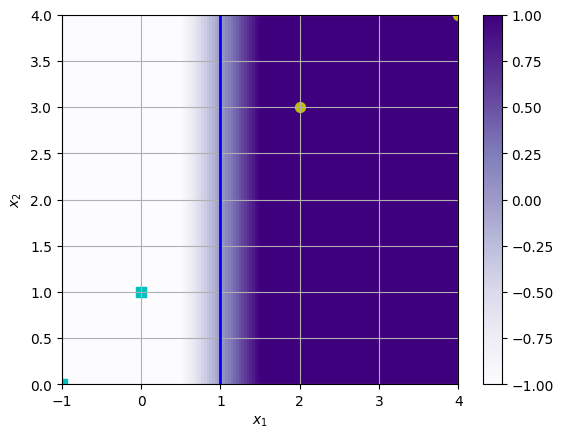

Learned Weights:  [[2. 0.]]
Bias:  [-2.]


In [5]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
X = np.array([[-1,0],[0,1],[4,4],[2,3]])
y = np.array([-1,-1,+1,+1])
clf.fit(X,y)
plotit(X,y,clf=clf.decision_function,conts=[0.0])
print("Learned Weights: ",clf.coef_)
print("Bias: ",clf.intercept_)

## Classifying digits
Below is a code for classifying between MNIST digits (7 vs 9) using nearest neighbor and Perceptron classifiers. Please try to understand the code and answer the following questions.

Accuracy of kNN: 0.9302325581395349


Text(0.5, 1.0, 'Misclassified: Predicted as -1')

<Figure size 640x480 with 0 Axes>

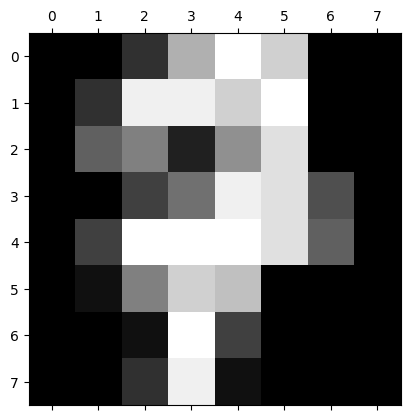

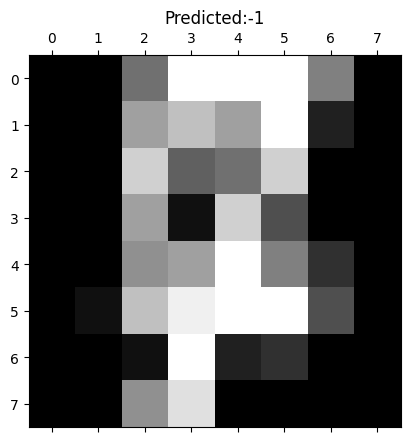

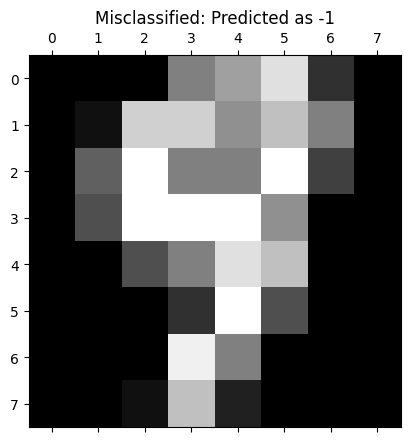

In [6]:
import numpy as np
from sklearn.datasets import load_digits
import random
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
digN,digP = 7,9
X,y = load_digits(n_class=10, return_X_y=True) #load the digits dataset
idx = (y==digP) + (y==digN) #Just focus on 7 and 9
X,y = X[idx,:], y[idx]
y[y==digN]=-1.0 #set (negative class)
y[y==digP]=+1.0 #set (positive class)
idx = list(range(len(y)))
random.shuffle(idx) # Just shuffle the data
X,y = X[idx,:], y[idx]
plt.gray();plt.matshow(X[0].reshape((8,-1)))
# show an example. we need to reshape to show as an image.

Ntr = 15 #select number of training examples
Xtr,Ytr = X[:Ntr], y[:Ntr] #get training examples
Xtt,Ytt = X[Ntr:], y[Ntr:] #get validation (test) examples

clf = KNeighborsClassifier(n_neighbors=1)
clf = clf.fit(Xtr, Ytr)
Z = clf.predict(Xtt)
print('Accuracy of kNN:',np.mean(Z==Ytt))
plt.gray();plt.matshow(Xtt[0].reshape((8,-1))); plt.title('Predicted:'+str(Z[0]))
error_idx = np.nonzero(Ytt!=np.sign(Z))[0][0] # show one error example
plt.gray();plt.matshow(Xtt[error_idx].reshape((8,-1))); plt.title('Misclassified: Predicted as '+str(Z[error_idx])) # show a misclassification





1. What is the relationship between accuracy over test examples and training set size for the classifier? How can you design an experiment to do this?
2. What is the impact of changing the value of k in the nearest neighbor classifier? Which value of k gives you the best validation performance?
3. Here, we are using each pixel as a feature. Can you extract better features that allow you to do better classification?

## Using Perceptron for Digit Classification

Use the codes provided above and compare the predictive performance of a perceptron for this problem. Compare the performance of the perceptron to the k-NN classifier. Which one is better and what is your intuition as to why that is the case.



In [7]:
# Your code goes here

Once you have trained and evaluated your perceptron, execute the following cell to show the internal representation of the weights of the perceptron (clf). What is your intuition about this?

In [8]:
plt.gray();plt.matshow(clf.coef_.reshape((8,-1)))

AttributeError: 'KNeighborsClassifier' object has no attribute 'coef_'

<Figure size 640x480 with 0 Axes>